In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import statsmodels.api as sm
from time import time
warnings.filterwarnings('ignore')
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import AlphaSelection



In [27]:
ccdefault=pd.read_csv('../data//UCI_Credit_Card.csv')
ccdefault.rename(columns={'default.payment.next.month':'DEFAULT'},inplace=True)
ccdefault.rename(columns={'PAY_0':'PAY_1'},inplace=True)
num_cv_iterations = 5

In [28]:
ccdefault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
DEFAULT      30000 non-null int64
dtypes: float64

#### Preparing Data for Classification. 
Using DEFAULT as response variable for classification

In [29]:
cc = ccdefault.copy() # taking a copy in memory
if 'DEFAULT' in cc:
    y = cc['DEFAULT'].values
    del cc['DEFAULT']
    del cc['ID']
    del cc['BILL_AMT1']
    del cc['BILL_AMT2']
    del cc['BILL_AMT3']
    del cc['BILL_AMT4']
    del cc['BILL_AMT5']
    del cc['BILL_AMT6']
    X = cc.values
num_cv_iterations = 5
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object.get_n_splits(X, y)
print(cv_object)
for train_index, test_index in cv_object.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=11, test_size=0.2,
            train_size=0.8)
TRAIN: [28976 29616 20315 ...  6063 16283 15621] TEST: [ 6669  6830 16516 ... 16163  1990  7999]
TRAIN: [11237  9898 17028 ...  1265   611  7250] TEST: [ 4174 19421 15502 ... 19995  6124 25090]
TRAIN: [23721 14143  5492 ...  4346  5119 23351] TEST: [21778  4074 19546 ...   941 14061 13584]
TRAIN: [19706  2009 13912 ...  3924 20112 21366] TEST: [ 7136 15572 21097 ... 24126  8440  7078]
TRAIN: [ 5794  1831 15948 ... 18673 15962 17274] TEST: [17565 28798 29978 ... 10151 11434 21212]


#### Preparing Data for Regression. 
Using PAY_AMT1 as response variable for regression

In [30]:
mcc = ccdefault.copy()
# Y Response variable dataframe
y_reg = mcc['PAY_AMT1'].values
# Features with no predictive features with respect to resposne variable
mcredit = mcc.drop(['PAY_AMT1'],axis=1)
# Create inci_X Explanatory Variables DF to support the individual models
mcc_X = mcredit
del mcc_X['DEFAULT']
del mcc_X['ID']
del mcc_X['BILL_AMT1']
del mcc_X['BILL_AMT2']
del mcc_X['BILL_AMT3']
del mcc_X['BILL_AMT4']
del mcc_X['BILL_AMT5']
del mcc_X['BILL_AMT6']

X_reg = mcc_X.values
num_instances = len(y_reg)
cv_object_reg = ShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object_reg.get_n_splits(X_reg, y_reg)
print(cv_object_reg)
for train_index, test_index in cv_object_reg.split(X_reg, y_reg):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
    y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]

ShuffleSplit(n_splits=5, random_state=11, test_size=0.2, train_size=0.8)
TRAIN: [10574  1826 26458 ... 21584  3775 10137] TEST: [16131 22502  9281 ...  2302 20117  5325]
TRAIN: [14312  5621  9756 ... 14795  1761 10411] TEST: [23990 12026 18018 ... 18504  3826 22997]
TRAIN: [24613 18862  7514 ...  9825 21800  7223] TEST: [25751  1408  2329 ... 13731  9430 17834]
TRAIN: [ 5199 22129  7059 ... 26445 16174 28119] TEST: [ 1736 20903   973 ... 24406 27021 16104]
TRAIN: [11485 26551  2766 ...  9370 20203 25639] TEST: [18873  8061  1602 ... 17926 20760   999]


In [31]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

## Modeling and Evaluation 3 

We planned to use 3 models for our classification. Random forest , Decision tree and KNN. 

### Classification Models 


#### Random Forest model 

Random forest is an ensempble technique that uses set of decision trees to handle classification problem. It uses random vectors to choose features absed on which it creates decision trees. Classification is done with each of these decision trees and then a majority vote is taken to decide final class. 
Following images gives an overview  of decision tree algo. 

In [32]:
Image(url ='../images/random_forest_tan.png')

Random forest classifiers use multiple estimators and each each estimator runs of different set of features based on random selection of features and attributes.

The time it takes to fit and predict for iteration 0  is 0.777461051940918 recall is 0.7669720482865503 
classification report for iteration 0 with improved recall 0.7669720482865503 


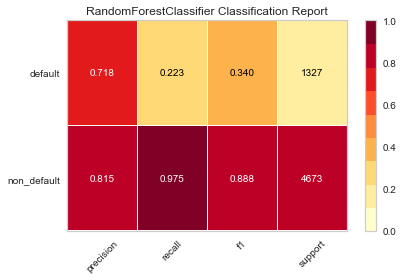

The time it takes to fit and predict for iteration 1  is 0.8434171676635742 recall is 0.7643242033102766 
The time it takes to fit and predict for iteration 2  is 0.694465160369873 recall is 0.7683328913811526 
classification report for iteration 2 with improved recall 0.7683328913811526 


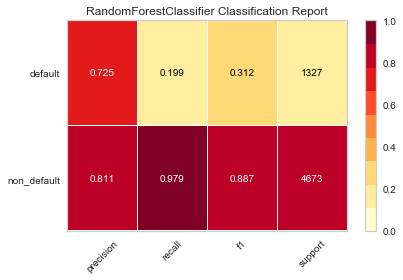

The time it takes to fit and predict for iteration 3  is 0.7749366760253906 recall is 0.7687389870533927 
classification report for iteration 3 with improved recall 0.7687389870533927 


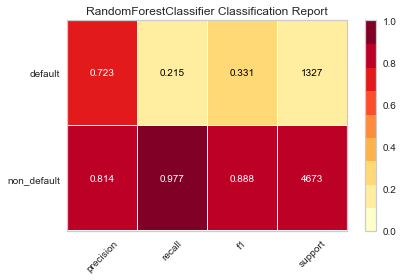

The time it takes to fit and predict for iteration 4  is 0.7276709079742432 recall is 0.7588288288288287 
The time it takes to fit and predict for iteration 5  is 7.331861734390259 recall is 0.6957406428304576 
The time it takes to fit and predict for iteration 6  is 7.058583736419678 recall is 0.681461521489878 
The time it takes to fit and predict for iteration 7  is 6.400363922119141 recall is 0.6838122309703806 
The time it takes to fit and predict for iteration 8  is 6.307348966598511 recall is 0.685263836111926 
The time it takes to fit and predict for iteration 9  is 6.21059513092041 recall is 0.6893297363688204 
The time it takes to fit and predict for iteration 10  is 21.900461196899414 recall is 0.7661859838274933 
The time it takes to fit and predict for iteration 11  is 22.207807302474976 recall is 0.7579867852113258 
The time it takes to fit and predict for iteration 12  is 22.222961902618408 recall is 0.7558528060646428 
The time it takes to fit and predict for iteration 

The time it takes to fit and predict for iteration 82  is 6.433340787887573 recall is 0.758792986040177 
The time it takes to fit and predict for iteration 83  is 6.596269845962524 recall is 0.7574265127323344 
The time it takes to fit and predict for iteration 84  is 6.820612192153931 recall is 0.7570256577872201 
The time it takes to fit and predict for iteration 85  is 22.93968677520752 recall is 0.7078478500768898 
The time it takes to fit and predict for iteration 86  is 23.504727125167847 recall is 0.6850663716814159 
The time it takes to fit and predict for iteration 87  is 23.701971769332886 recall is 0.6950954861111112 
The time it takes to fit and predict for iteration 88  is 22.99558401107788 recall is 0.6925113796058693 
The time it takes to fit and predict for iteration 89  is 23.05741310119629 recall is 0.694567230944168 


In [33]:
## Random Forest classifiers models with different parameters 

iter_num=0
times_rec=[]
 
rf_max_acc = 0
rf_max_recal = 0
rf_trn_idx_max_acc = []
rf_tst_idx_max_acc  = []
rf_estimator_for_max = 0
rf_max_depth_max = 0
rf_class_weight_max = None

#for loop 
estimators = [100,   500, 1000]
max_depths = [2,5,10]
class_weights = [None , 'balanced']
for estimator , max_depth , class_weight in zip(estimators*len(max_depths)*len(class_weights) ,
             max_depths*len(class_weights)*len(estimators),
             class_weights*len(max_depths)*len(estimators)):
    for train_indices, test_indices in cv_object.split(X,y): 
        X_train = X[train_indices]
        y_train = y[train_indices] 
        X_test = X[test_indices]
        y_test = y[test_indices]

         #we count the time in executing the logistic regression
        t0 = time()
        random_forest = RandomForestClassifier(n_estimators=estimator, max_depth=max_depth, class_weight= class_weight,
                                               random_state=0)

        random_forest.fit(X_train,y_train)  # train object
        y_hat = random_forest.predict(X_test) # get test set precitions

        t1=time()
        diff=np.array([t1-t0])

        times_rec=np.append(times_rec,diff)


        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        acc = mt.accuracy_score(y_test,y_hat)
        rcl = recall_score(y_hat,y_test,  average='macro') 
        print ("The time it takes to fit and predict for iteration {}  is {} recall is {} ".format(iter_num, diff[0],
                                                                                                   rcl)) 

        #if acc > rf_max_acc :
        if rcl > rf_max_recal:
            #rf_max_acc = acc
            rf_max_recal = rcl
            rf_trn_idx_max_acc = train_indices
            rf_tst_idx_max_acc  = test_indices
            rf_estimator_for_max = estimator
            rf_max_depth_max = max_depth
            rf_class_weight_max = class_weight
            
            print ("classification report for iteration {} with improved recall {} ".format(iter_num, rcl))
            rf_cl_reporter = ClassificationReport(random_forest, classes=['non_default' , 'default'], support=True)
            rf_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
            rf_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
            rf_cl_reporter.show()   


        iter_num+=1    

####  Decision Tree classifiers 

Decision Trees are used to classify model based on different split rules. like gini.
We are creating multiple models and choosing one based on max recall score for our further analysis

In [34]:
Image(url ='../images/decision_tree_tan.png')

The time it takes to fit and predict for iteration 0  is 0.2852299213409424 
classification report for iteration 0 


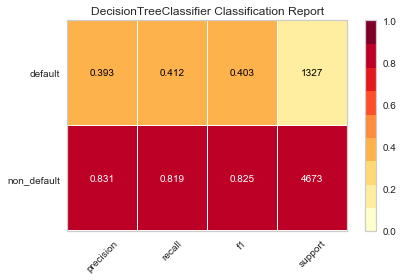

The time it takes to fit and predict for iteration 1  is 0.25689220428466797 
classification report for iteration 1 


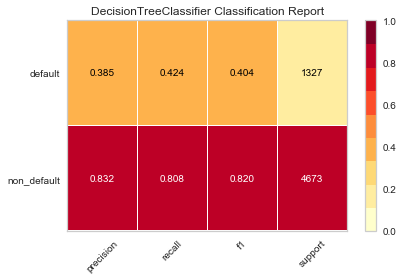

The time it takes to fit and predict for iteration 2  is 0.25757694244384766 
The time it takes to fit and predict for iteration 3  is 0.2674448490142822 
The time it takes to fit and predict for iteration 4  is 0.24551081657409668 
The time it takes to fit and predict for iteration 5  is 0.2222890853881836 
The time it takes to fit and predict for iteration 6  is 0.23229122161865234 
The time it takes to fit and predict for iteration 7  is 0.2252511978149414 
The time it takes to fit and predict for iteration 8  is 0.22176909446716309 
The time it takes to fit and predict for iteration 9  is 0.24486613273620605 


In [35]:
## Decision tree classifiers 

iter_num=0
times_rec=[]
decision_tree_classifiers = dict()
random_forest_classifiers = dict()

class_weights = [None , 'balanced']
dt_max_acc = 0
dt_max_recall = 0
dt_trn_idx_max_acc =[]
dt_tst_idx_max_acc = []
dt_class_weight_for_max = []

for class_weight in class_weights:
    for train_indices, test_indices in cv_object.split(X,y): 
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]

         #we count the time in executing the logistic regression
        t0 = time()
        decision_tree = DecisionTreeClassifier(class_weight = class_weight)
        decision_tree.fit(X_train,y_train)  # train object
        y_hat = decision_tree.predict(X_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])

        print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
        times_rec=np.append(times_rec,diff)


        # now let's get the accuracy , recall and confusion matrix for this iterations of training/testing
        acc = mt.accuracy_score(y_test,y_hat)
        rcl = recall_score(y_test, y_hat, average='macro') 

        #if acc> dt_max_acc:
        if rcl> dt_max_recall:
            #dt_max_acc = acc
            dt_max_recall = rcl
            dt_trn_idx_max_acc = train_indices
            dt_tst_idx_max_acc = test_indices
            dt_class_weight_for_max = class_weight
            conf = mt.confusion_matrix(y_test,y_hat)
            print ("classification report for iteration {} ".format(iter_num))

            dt_cl_reporter = ClassificationReport(decision_tree, classes=['non_default' , 'default'], support=True)
            dt_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
            dt_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
            dt_cl_reporter.show()  

       
        iter_num+=1
    

#### KNN 


In [36]:
parameters = [10, 20, 50, 100]
metrices = ['euclidean', 'cosine', 'manhattan']
max_acc_knn = 0 
max_mat =[]
max_k = 0
for mat in metrices:
    for K in parameters:
        for train_indices, test_indices in cv_object.split(X,y): 
            X_train = X[train_indices]
            y_train = y[train_indices]
            X_test = X[test_indices]
            y_test = y[test_indices]   
            X_train_scaled = scl_obj.transform(X_train) # apply to training
            X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)
            print("For k = ", K, "and metric = Euclidean: ")
            knn = KNeighborsClassifier(n_neighbors= param, weights='uniform', metric=mat)
            knn.fit(X_train_scaled,y_train)
            y_hat = knn.predict(X_test_scaled)
            acc = mt.accuracy_score(y_test,y_hat)
            conf = mt.confusion_matrix(y_test,y_hat)
            #print('accuracy:', acc )
            #print(conf)
            ClassReport = mt.classification_report(y_test,y_hat)
            print(ClassReport)
            
            if acc>max_acc_knn :
                max_acc_knn = acc
                max_mat = mat
                max_k = param
             

    
print("Max accuracy is:", max_acc_knn)    

For k =  10 and metric = Euclidean: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.65      0.32      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000

For k =  10 and metric = Euclidean: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.31      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000

For k =  10 and metric = Euclidean: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.65      0.30      0.41      1327

    accuracy                           0.81      6000
   macro avg     

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.32      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.66      6000
weighted avg       0.79      0.81      0.78      6000

For k =  10 and metric = Euclidean: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.33      0.44      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000

For k =  20 and metric = Euclidean: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.33      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000


              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4673
           1       0.62      0.31      0.41      1327

    accuracy                           0.80      6000
   macro avg       0.72      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000

For k =  20 and metric = Euclidean: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.65      0.30      0.41      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000

For k =  20 and metric = Euclidean: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.66      0.31      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.63      0.66      6000


### Regression Models 

#### Random Forest Regession 

In [37]:
## Random forest regression models with different parameters 

iter_num=0
times_rec=[]
 
rf_reg_max_score = 0
rf_reg_trn_idx_max_acc = []
rf_reg_tst_idx_max_acc  = []
rf_reg_estimator_for_max = 0
rf_reg_max_depth_max = 0

#for loop 
estimators = [100, 500, 1000]
max_depths = [2, 10]
for estimator , max_depth  in zip(estimators*len(max_depths),max_depths* len(estimators)):
    for train_index, test_index in cv_object_reg.split(X_reg,y_reg): 
        X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
        y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
         
        
         #we count the time in executing the logistic regression
        t0 = time()
        random_forest = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, 
                                              random_state=0)
        random_forest.fit(X_reg_train,y_reg_train)  # train object
        y_reg_hat = random_forest.predict(X_reg_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])
        times_rec=np.append(times_rec,diff)
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        score = random_forest.score(X_reg_test,y_reg_test)
        print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        if score > rf_reg_max_score :
            rf_reg_trn_idx_max_acc = train_index
            rf_reg_tst_idx_max_acc = test_index
            rf_reg_estimator_for_max = estimator
            rf_reg_max_depth_max = max_depth
            
        iter_num+=1
        
    

The time it takes to fit and predict for iteration 0 is 1.5000290870666504 score is 0.16360892980972486 
The time it takes to fit and predict for iteration 1 is 1.4606800079345703 score is 0.09137216065580522 
The time it takes to fit and predict for iteration 2 is 1.5032899379730225 score is -0.044368448598679056 
The time it takes to fit and predict for iteration 3 is 1.6006050109863281 score is -0.23572244690454916 
The time it takes to fit and predict for iteration 4 is 1.5121722221374512 score is 0.026385366168372722 
The time it takes to fit and predict for iteration 5 is 33.141146183013916 score is 0.25540045508964815 
The time it takes to fit and predict for iteration 6 is 33.50148606300354 score is 0.23194902305575082 
The time it takes to fit and predict for iteration 7 is 33.6496467590332 score is 0.07493438381740214 
The time it takes to fit and predict for iteration 8 is 33.92156624794006 score is -0.14625755356806347 
The time it takes to fit and predict for iteration 9 i

####  Decision Tree Regession 

In [38]:
iter_num=0
times_rec=[]
 
dt_reg_max_acc = 0
dt_reg_trn_idx_max_acc = []
dt_reg_tst_idx_max_acc  = []
dt_reg_max_depth_max = 0

#for loop 
estimators = [100,  1000]
max_depths = [2,10]
for   max_depth  in max_depths:
    for test_index, test_index in cv_object_reg.split(X_reg,y_reg): 
        X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
        y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
         
         #we count the time in executing the logistic regression
        t0 = time()
        decision_tree = DecisionTreeRegressor(max_depth=max_depth, 
                                              random_state=0)
        decision_tree.fit(X_reg_train,y_reg_train)  # train object
        y_reg_hat = decision_tree.predict(X_reg_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])
        times_rec=np.append(times_rec,diff)
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        score = decision_tree.score(X_reg_test,y_reg_test)
        
        print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        
        if dt_reg_max_acc> score:
            dt_reg_trn_idx_max_acc = train_index
            dt_reg_tst_idx_max_acc = test_index
            dt_reg_max_depth_max = max_depth
        iter_num+=1

The time it takes to fit and predict for iteration 0 is 0.0399937629699707 score is 0.3096141380079973 
The time it takes to fit and predict for iteration 1 is 0.03844714164733887 score is 0.08268366269192973 
The time it takes to fit and predict for iteration 2 is 0.037178754806518555 score is 0.0721189294715161 
The time it takes to fit and predict for iteration 3 is 0.03728175163269043 score is 0.07014883678137007 
The time it takes to fit and predict for iteration 4 is 0.03790092468261719 score is -0.4461196476543723 
The time it takes to fit and predict for iteration 5 is 0.17900705337524414 score is 0.6168875160335299 
The time it takes to fit and predict for iteration 6 is 0.17632317543029785 score is 0.23556266502573686 
The time it takes to fit and predict for iteration 7 is 0.17621111869812012 score is 0.2878067166408218 
The time it takes to fit and predict for iteration 8 is 0.17589998245239258 score is 0.023151277835449235 
The time it takes to fit and predict for iteratio

#### KNN Regession 

## Modeling and Evaluation 4
Analysis of the performance of the model 

## Classification Tasks 

#### Random Forest 
Random Forest gives 
Analysis of Random forst with the best estimate 

running model for max accuracy 0
parameters for the model with best accuracy is num_estimators 100 , max_depth 2 and class_weight
The time it takes to fit and predict for iteration 10  is 1.194929838180542 
classification report for iteration 10 


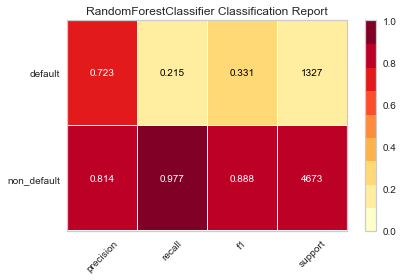

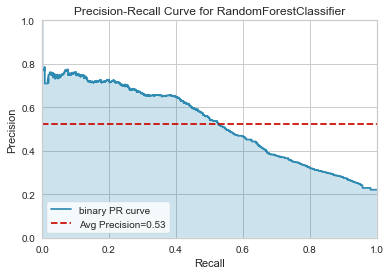

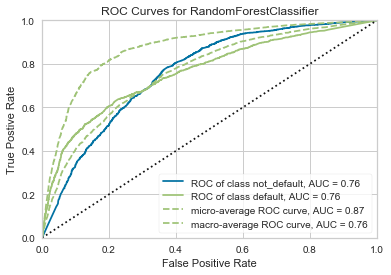

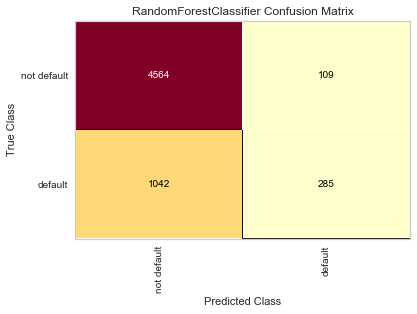

In [39]:
t0 = time()


X_train, X_test = X[rf_trn_idx_max_acc], X[rf_tst_idx_max_acc]
y_train, y_test = y[rf_trn_idx_max_acc], y[rf_tst_idx_max_acc]

print ('running model for max accuracy {}'.format(rf_max_acc))
print('parameters for the model with best accuracy is num_estimators {} , max_depth {} and class_weight'.format(
    rf_estimator_for_max, rf_max_depth_max,  rf_class_weight_max))

random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)


random_forest.fit(X_train,y_train)  # train object
y_hat = random_forest.predict(X_test) # get test set precitions

t1=time()
diff=np.array([t1-t0])

print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)


# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))

rf_cl_reporter = ClassificationReport(random_forest, classes=['non_default' , 'default'], support=True)

rf_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
rf_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
rf_cl_reporter.show()   

pr_curve = PrecisionRecallCurve(random_forest)
pr_curve.fit(X_train, y_train)
pr_curve.score(X_test, y_test)
pr_curve.show()


roc_curve = ROCAUC(random_forest, classes=["not_default", "default"])
roc_curve.fit(X_train, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test, y_test)        # Evaluate the model on the test data
roc_curve.show() 


cm = ConfusionMatrix(random_forest, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.show()

#### Decision Tree 

Running model for max decision tree accuracy model 0
Parameters for decision tree for max accuracy class_weight None
The time it takes to fit and predict for iteration 10  is 0.4231441020965576 
accurancy for balanced class is 0.725
classification report for iteration 10 


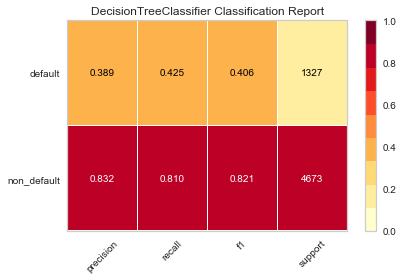

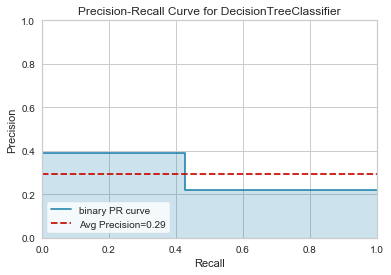

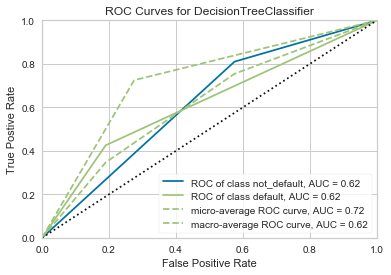

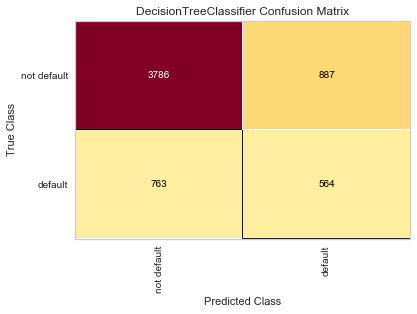

In [40]:
t0 = time()

print('Running model for max decision tree accuracy model {}'.format(dt_max_acc  ))
 
print('Parameters for decision tree for max accuracy class_weight {}'.format(dt_class_weight_for_max  ))


X_train, X_test = X[dt_trn_idx_max_acc], X[dt_tst_idx_max_acc]
y_train, y_test = y[dt_trn_idx_max_acc], y[dt_tst_idx_max_acc]
     
decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)

decision_tree.fit(X_train,y_train)  # train object
y_hat = decision_tree.predict(X_test) # get test set precitions

t1=time()
diff=np.array([t1-t0])
print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)
# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
print("accurancy for balanced class is {}".format(acc))
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))
dt_cl_reporter = ClassificationReport(decision_tree, classes=['non_default' , 'default'], support=True)

dt_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
dt_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
dt_cl_reporter.show()  

pr_curve = PrecisionRecallCurve(decision_tree)
pr_curve.fit(X_train, y_train)
pr_curve.score(X_test, y_test)
pr_curve.show()

roc_curve = ROCAUC(decision_tree, classes=["not_default", "default"])

roc_curve.fit(X_train, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test, y_test)        # Evaluate the model on the test data
roc_curve.show() 

cm = ConfusionMatrix(decision_tree, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.show()

iter_num+=1

As we can see from above 

####  KNN 

Running model for max decision tree accuracy model 0
Parameters for decision tree for max accuracy class_weight None
The time it takes to fit and predict for iteration 11  is 6.014520883560181 
accurancy for balanced class is 0.8045
classification report for iteration 11 


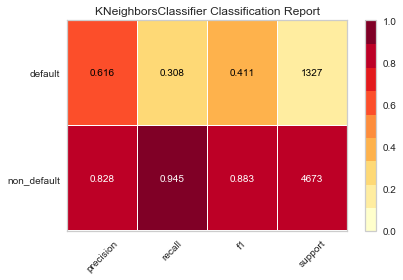

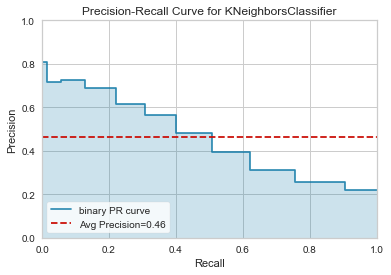

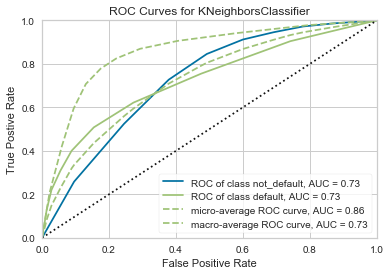

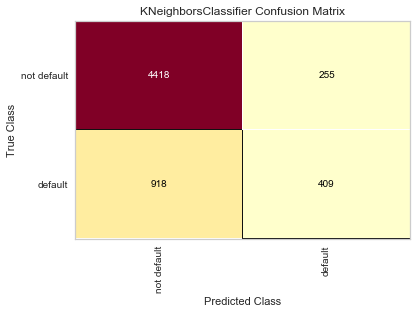

In [41]:
 
t0 = time()

print('Running model for max decision tree accuracy model {}'.format(dt_max_acc  )) 
print('Parameters for decision tree for max accuracy class_weight {}'.format(dt_class_weight_for_max  ))


X_train, X_test = X[dt_trn_idx_max_acc], X[dt_tst_idx_max_acc]
y_train, y_test = y[dt_trn_idx_max_acc], y[dt_tst_idx_max_acc]
     
    
knn = KNeighborsClassifier(n_neighbors= max_k, weights='uniform', metric=max_mat)
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)
knn.fit(X_train_scaled,y_train)
y_hat = knn.predict(X_test_scaled)

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


t1=time()
diff=np.array([t1-t0])
print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)
# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
print("accurancy for balanced class is {}".format(acc))
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))
knn_cl_reporter = ClassificationReport(knn, classes=['non_default' , 'default'], support=True)

knn_cl_reporter.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
knn_cl_reporter.score(X_test_scaled, y_test)        # Evaluate the model on the test data
knn_cl_reporter.show()  

pr_curve = PrecisionRecallCurve(knn)
pr_curve.fit(X_train_scaled, y_train)
pr_curve.score(X_test_scaled, y_test)
pr_curve.show()

roc_curve = ROCAUC(knn, classes=["not_default", "default"])

roc_curve.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test_scaled, y_test)        # Evaluate the model on the test data
roc_curve.show() 

cm = ConfusionMatrix(knn, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)
# How did we do?
cm.show()

iter_num+=1

### Regression Tasks 

#### Random Forest Regression 

running model for max score 0
parameters for the model with best accuracy is num_estimators 1000 , max_depth 10


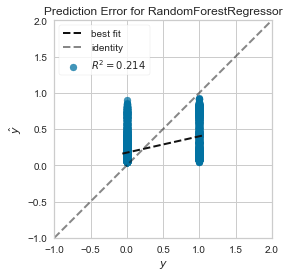

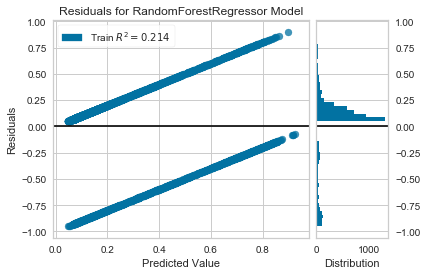

In [42]:
t0 = time()

X_train, X_test = X[rf_reg_trn_idx_max_acc], X[rf_reg_tst_idx_max_acc]
y_train, y_test = y[rf_reg_trn_idx_max_acc], y[rf_reg_tst_idx_max_acc]

print ('running model for max score {}'.format(rf_reg_max_score))
print('parameters for the model with best accuracy is num_estimators {} , max_depth {}'.format(
    rf_reg_estimator_for_max, rf_reg_max_depth_max))

random_forest = RandomForestRegressor(n_estimators=rf_reg_estimator_for_max, max_depth=rf_reg_max_depth_max, 
                                              random_state=0)


rf_pred_error = PredictionError(random_forest)

rf_pred_error.fit(X_train, y_train)  # Fit the training data to the visualizer
rf_pred_error.score(X_test, y_test)  # Evaluate the model on the test data
rf_pred_error.show() 

res_plt = ResidualsPlot(random_forest)
res_plt.fit(X_test, y_test)
res_plt.show()

#### Decision Tree 

running model for max score 0
parameters for the model with best accuracy is   max_depth 10


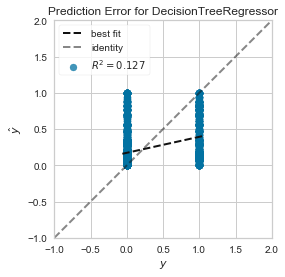

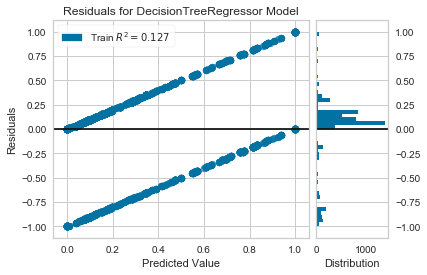

In [43]:
t0 = time()
 
X_train, X_test = X[dt_reg_trn_idx_max_acc], X[dt_reg_tst_idx_max_acc]
y_train, y_test = y[dt_reg_trn_idx_max_acc], y[dt_reg_tst_idx_max_acc]

print ('running model for max score {}'.format(dt_reg_max_acc))
print('parameters for the model with best accuracy is   max_depth {}'.format( dt_reg_max_depth_max))

decision_tree = DecisionTreeRegressor(max_depth=dt_reg_max_depth_max, 
                                              random_state=0)

rf_pred_error = PredictionError(decision_tree)

rf_pred_error.fit(X_train, y_train)  # Fit the training data to the visualizer
rf_pred_error.score(X_test, y_test)  # Evaluate the model on the test data
rf_pred_error.show() 

res_plt = ResidualsPlot(decision_tree)
res_plt.fit(X_test, y_test)
res_plt.show()

#### KNN

## Modeling and Evaluation 5

Following is a Comparison of Decision Tree and Random forest classifiers with same date. We are using error estimates to compare two models. The error estimates should follow Gaussian distribution. We calculate mean and standard error using the formula discussed in the class. 
<TODO add image and formula >
    We are caclulating confidence interval for error differences to figure out if the differences are significant
  We can add similar test for knn , decision tree and knn and random forest comparison 


### Decision Tree and Random Forest Comparision based on error rate 

Our model comparison is based on following formula. 
We compare d bar by taking averedge  of the differences of the error rates of the models in different folds using same training set data.
The crieteria for model comparison is difference in error rates of the models which turns out to be same as difference between accuracies of the models. The Null hypothesis is that all choosen models have same accuracy.
We have choosen parameters for best performing models from different classes for the comparison. These models are run multiple times based on cross validation split and corresponding accuracies from each fold are compared.

In [44]:
Image(url ='../images/model_comparison.png')

In [50]:
iter_num=0
times_rec=[]
error_rec= [] 
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)
    decision_tree.fit(X_train,y_train) # train object
    
    random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)
    random_forest.fit(X_train,y_train) 
    
    y_hat_dt = decision_tree.predict(X_test) 
    y_hat_rf = random_forest.predict(X_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_dt = mt.accuracy_score(y_test,y_hat_dt)
    acc_rf = mt.accuracy_score(y_test,y_hat_rf)
    error_rec.append(acc_dt - acc_rf)

    iter_num+=1

print(error_rec)

d_bar = sum(error_rec)/len(error_rec)
siqma_squared = sum((error_rec - d_bar))/(5-1)
print(d_bar)
print(siqma_squared)

from scipy import stats
import math

confidence_interval = ( d_bar + (1/math.sqrt(4))*stats.t.isf(.975, 4),  d_bar - (1/math.sqrt(4))*stats.t.isf(.975, 4))
print(confidence_interval)

[-0.07966666666666666, -0.08299999999999996, -0.08950000000000002, -0.08450000000000002, -0.08333333333333326]
-0.08399999999999999
6.938893903907228e-18
(-1.4722225525988994, 1.3042225525988993)


As we can see above tht zero is a possible value for 95% confidence interval it means that we can't reject the null hypothesis that both the models have no difference in their error rate with 95% confidence.

###  KNN  and Random Forest Comparision based on error rate 

In [51]:
iter_num=0
times_rec=[]
error_rec= [] 
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    knn = KNeighborsClassifier(n_neighbors= max_k, weights='uniform', metric=max_mat)

    random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)
    knn.fit(X_train,y_train) # train object

    random_forest.fit(X_train,y_train) 
    
    y_hat_knn = knn.predict(X_test) 
    y_hat_rf = random_forest.predict(X_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_knn = mt.accuracy_score(y_test,y_hat_knn)
    acc_rf = mt.accuracy_score(y_test,y_hat_rf)
    error_rec.append(acc_knn - acc_rf)

    iter_num+=1

print(error_rec)

d_bar = sum(error_rec)/len(error_rec)
siqma_squared = sum((error_rec - d_bar))/(5-1)
print(d_bar)
print(siqma_squared)

from scipy import stats
import math

confidence_interval = ( d_bar + (1/math.sqrt(4))*stats.t.isf(.975, 4),  d_bar - (1/math.sqrt(4))*stats.t.isf(.975, 4))
print(confidence_interval)

[-0.02949999999999997, -0.02949999999999997, -0.02633333333333332, -0.03283333333333338, -0.03166666666666662]
-0.029966666666666652
-8.673617379884035e-19
(-1.418189219265566, 1.3582558859322327)


## Modeling and Evaluation 6

We 'll be checking feature importance for our best performing model in this section. 

### Random Forest 

Feature importance for best performing  random forest model

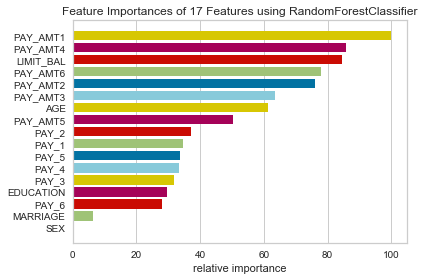

In [47]:
iter_num=0
times_rec=[]

X_train, X_test = X[rf_trn_idx_max_acc], X[rf_tst_idx_max_acc]
y_train, y_test = y[rf_trn_idx_max_acc], y[rf_tst_idx_max_acc]
 #we count the time in executing the logistic regression
t0 = time()
random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)
viz = FeatureImportances(random_forest, labels = cc.columns)
viz.fit(X_train_scaled,y_train)
viz.show()

As We can see from the above graph the most important features for determining whether a person will default or not are PAY_AMT's and Limit balance. We can interpret from this model that the possibility of a person getting detault is based on his his payment of past dues more specifically the most recent one. The Most recent payment pattern is one of the major factor to determine whether a person is going to default in next month or not.
The model also underlines some less important features like education , marriage and sex which don't seem to be that important in a person a chances of getting default next month. 
The model conclusion are aligned with common sense reasoning that a person in financial crisis is more likely to reflect that effect in his current and most recent financial transactions and the financial behavior are less of a factor of sex , marital status or education

### Decision Tree 

Feature importance for best performing  random forest model

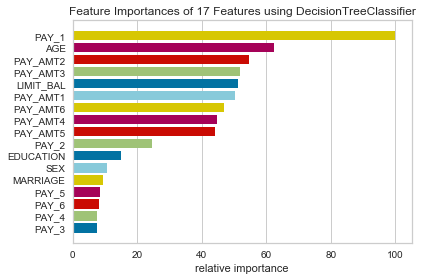

In [48]:
iter_num=0
times_rec=[]
X_train, X_test = X[dt_trn_idx_max_acc], X[dt_tst_idx_max_acc]
y_train, y_test = y[dt_trn_idx_max_acc], y[dt_tst_idx_max_acc]
     
decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)
    
 #we count the time in executing the logistic regression
t0 = time()
random_forest = DecisionTreeClassifier()
viz = FeatureImportances(decision_tree, labels = cc.columns)
viz.fit(X_train,y_train)
viz.show()

Relative of features as per the Decision Tree are almost same as that of Random forest. One distict feature of this model is that it gives more emphasis on PAY_1 attribute. which is the current payment status of a customer. The effect of this attibute averages out in case of Random forest model as that one relies on multiple decision trees and all of them this attirbute might not even be selected.
The reasoning of a person getting defauled based on his current history is supported by decision tree model as well.
This model also support the conclusion of Rendon forest model related to less important features of a person getting default. Sex, ,arital status and education are relatively less important. 

### KNN 

In case of knn there is no output for feature importance. We run into following error when we attempt to draw graph in same way in which we did for decision tree and random forest. 
In case of KNN we use particular metric to determine proximity of nodes and cluster them accordingly. The distnace is measured based on the difference between corresponding features.

In [49]:
iter_num=0
times_rec=[]
 

for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices] 
    X_test = X[test_indices]
    y_test = y[test_indices]
    
     #we count the time in executing the logistic regression
    t0 = time()
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
    #viz = FeatureImportances(knn, labels = cc.columns)
    #viz.fit(X_train_scaled,y_train)
    #viz.show()

### References 
    * Introduction To Data Mining by Tan, Steinbach, and Kumar First Edition, ISBN-10: 0321321367
    * Async Lectures from SMU ML 7331 course 